In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv ( 'salaries.csv' )
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [3]:
print(df.dtypes)
df.info()

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_loca

In [4]:
print ( df.isnull () .sum () )

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [5]:
missing_values = df.isnull().sum()

df.dropna ( axis = 0 , inplace = True)

print ( df.isnull () .sum () )

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [6]:
# Intentar convertir a números
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
df['work_year'] = pd.to_numeric(df['work_year'], errors='coerce')

duplicate_count = df.duplicated().sum()
duplicate_rows = df[df.duplicated()]
print("Total duplicate rows:", duplicate_count)
print("First few duplicate rows:")
print(duplicate_rows.head())

Total duplicate rows: 79532
First few duplicate rows:
    work_year experience_level employment_type job_title  salary  \
14       2025               SE              FT   Manager  230000   
15       2025               SE              FT   Manager  121000   
16       2025               SE              FT   Manager  230000   
17       2025               SE              FT   Manager  121000   
18       2025               SE              FT   Manager  230000   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
14             USD         230000                 US             0   
15             USD         121000                 US             0   
16             USD         230000                 US             0   
17             USD         121000                 US             0   
18             USD         230000                 US             0   

   company_location company_size  
14               US            M  
15               US            M  
16         

In [7]:
df.drop_duplicates(inplace=True)
df.shape
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [8]:
df.drop(['salary', 'salary_currency'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,US,100,US,M


In [9]:
df.to_csv('salaries_cleaned.csv', index=False)

In [10]:
print(employment_type_percentages)

NameError: name 'employment_type_percentages' is not defined

In [11]:
df_ft = df[df['employment_type'] == 'FT'].copy()
print(f"Shape of the original DataFrame: {df.shape}")
print(f"Shape of the filtered DataFrame (FT only): {df_ft.shape}")

Shape of the original DataFrame: (71913, 9)
Shape of the filtered DataFrame (FT only): (71163, 9)


In [12]:
# Select categorical columns
categorical_cols = df_ft.select_dtypes(include='object').columns

# Calculate and print percentages for each categorical column
for col in categorical_cols:
    print(f"\nPorcentaje de cada categoría en '{col}':")
    print(df_ft[col].value_counts(normalize=True) * 100)


Porcentaje de cada categoría en 'experience_level':
experience_level
SE    52.728244
MI    32.523924
EN    10.762615
EX     3.985217
Name: proportion, dtype: float64

Porcentaje de cada categoría en 'employment_type':
employment_type
FT    100.0
Name: proportion, dtype: float64

Porcentaje de cada categoría en 'job_title':
job_title
Data Scientist                   9.975690
Data Engineer                    9.833762
Data Analyst                     8.791085
Software Engineer                6.850470
Engineer                         6.079002
                                   ...   
Consultant Data Engineer         0.001405
Quantitative Research Analyst    0.001405
Data Analyst Lead                0.001405
Cloud Data Architect             0.001405
Analytics Engineering Manager    0.001405
Name: proportion, Length: 419, dtype: float64

Porcentaje de cada categoría en 'employee_residence':
employee_residence
US    83.702205
CA     6.364262
GB     3.930413
AU     0.689965
NL     0.555064
  

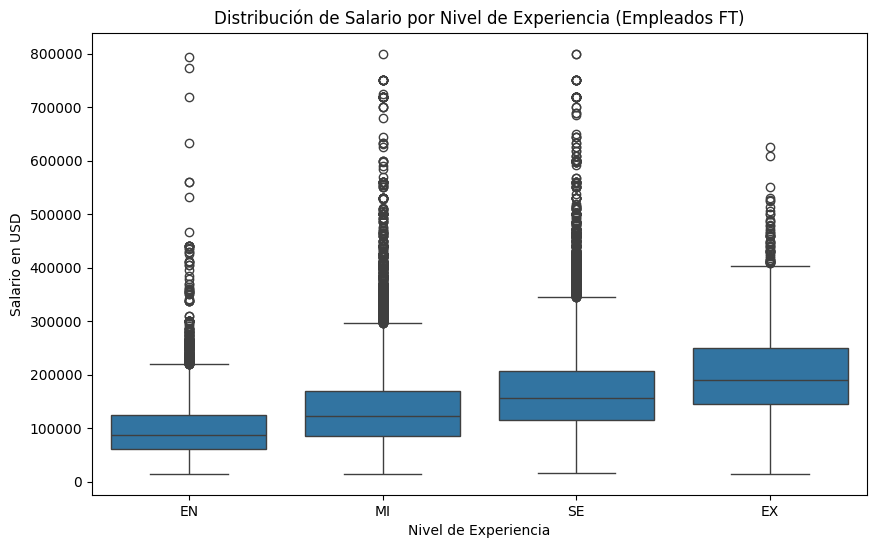

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ft, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'])
plt.title('Distribución de Salario por Nivel de Experiencia (Empleados FT)')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.show()

# Task
Remove outliers from all numerical columns in the DataFrame using the IQR method.

## Identify numerical columns

### Subtask:
Identify the numerical columns in the DataFrame.


**Reasoning**:
Identify the numerical columns in the DataFrame `df_ft` and store their names in a list.



In [14]:
numerical_cols = df_ft.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Identified numerical columns:", numerical_cols)

Identified numerical columns: ['work_year', 'salary_in_usd', 'remote_ratio']


## Define outlier removal function

### Subtask:
Create a function to identify and remove outliers using the Interquartile Range (IQR) method.


**Reasoning**:
Define the `remove_outliers_iqr` function as per the instructions.



In [15]:
def remove_outliers_iqr(df, column):
  """
  Removes outliers from a DataFrame column using the IQR method.

  Args:
    df: The input DataFrame.
    column: The name of the column to remove outliers from.

  Returns:
    The DataFrame with outliers removed from the specified column.
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
  return df_filtered

## Apply outlier removal

### Subtask:
Apply the outlier removal function to the numerical columns of the DataFrame.


**Reasoning**:
Iterate through the numerical columns and apply the outlier removal function to the DataFrame.



In [16]:
for col in numerical_cols:
    df_ft = remove_outliers_iqr(df_ft, col)

print("Shape of the DataFrame after outlier removal:", df_ft.shape)

Shape of the DataFrame after outlier removal: (51677, 9)


## Verify changes

### Subtask:
Display the shape of the DataFrame before and after outlier removal to confirm the changes.


**Reasoning**:
Print the shape of the DataFrame before and after outlier removal to confirm the changes.



In [17]:
print(f"Shape of the DataFrame before outlier removal: (71163, 9)")
print(f"Shape of the DataFrame after outlier removal: {df_ft.shape}")

Shape of the DataFrame before outlier removal: (71163, 9)
Shape of the DataFrame after outlier removal: (51677, 9)


## Visualize the data

### Subtask:
Visualize the data after removing outliers to observe the effect.


**Reasoning**:
Create a box plot to visualize the distribution of 'salary_in_usd' by 'experience_level' after outlier removal.



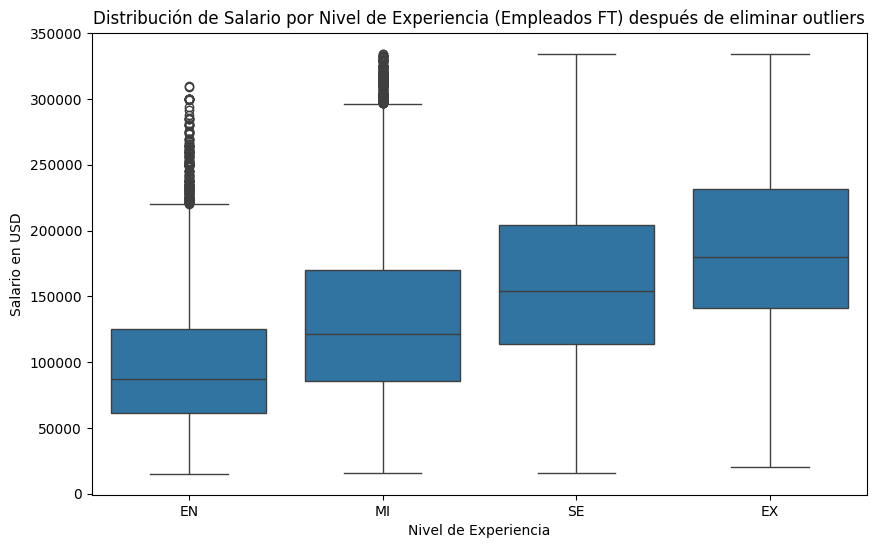

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ft, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'])
plt.title('Distribución de Salario por Nivel de Experiencia (Empleados FT) después de eliminar outliers')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The numerical columns identified for outlier removal were 'work\_year', 'salary\_in\_usd', and 'remote\_ratio'.
*   A function `remove_outliers_iqr` was successfully defined to remove outliers using the IQR method.
*   Applying the outlier removal process reduced the number of rows in the DataFrame from 71,163 to 51,677, indicating that 19,486 rows were removed.
*   A box plot visualizing the distribution of 'salary\_in\_usd' by 'experience\_level' was generated using the DataFrame after outlier removal.

### Insights or Next Steps

*   The significant reduction in rows suggests a considerable number of outliers were present in the original numerical columns.
*   The visualization confirms that the box plot for 'salary\_in\_usd' by 'experience\_level' now represents the data distribution after the removal of outliers using the IQR method.


# Task
Generate a box plot of the "Precio" column from the DataFrame, with outliers removed. Customize the plot by using different colors for each box plot, setting an aesthetic background, and styling the titles and axis labels.

## Modify the plotting code

### Subtask:
Update the existing code to include different colors for each box plot and set a custom background style.


**Reasoning**:
Set the plot style and generate the box plot with different colors for each box plot using a specified palette and set a custom background style.



/tmp/ipython-input-3432025434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ft, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'], palette='viridis')


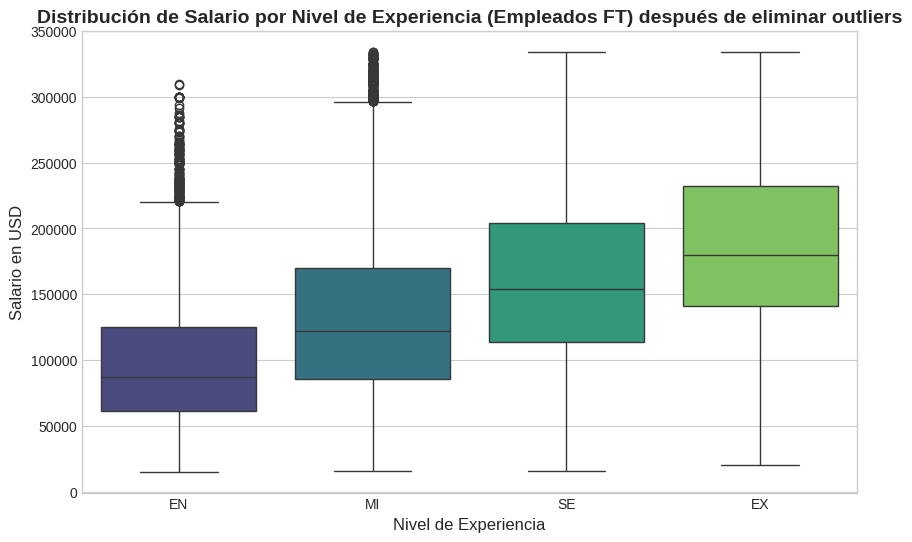

In [19]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ft, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'], palette='viridis')
plt.title('Distribución de Salario por Nivel de Experiencia (Empleados FT) después de eliminar outliers', fontsize=14, fontweight='bold')
plt.xlabel('Nivel de Experiencia', fontsize=12)
plt.ylabel('Salario en USD', fontsize=12)
plt.show()

## Customize plot elements

### Subtask:
Adjust the appearance of titles and axis labels for better aesthetics.


**Reasoning**:
Adjust the font size and weight of the plot title and axis labels for better aesthetics.



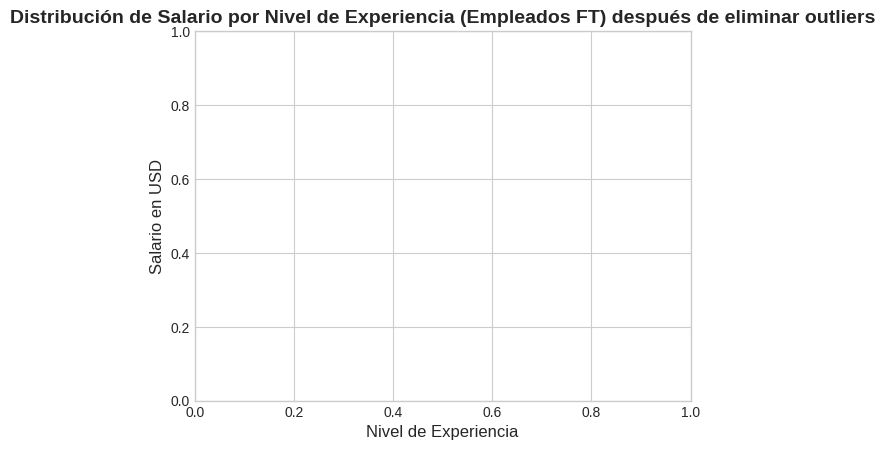

In [20]:
ax = plt.gca()
ax.set_title('Distribución de Salario por Nivel de Experiencia (Empleados FT) después de eliminar outliers', fontsize=14, fontweight='bold')
ax.set_xlabel('Nivel de Experiencia', fontsize=12)
ax.set_ylabel('Salario en USD', fontsize=12)
plt.gcf()
plt.show()

**Reasoning**:
The plot is empty because the boxplot was not generated in the previous cell. Regenerate the boxplot with the updated title and axis labels.



/tmp/ipython-input-260763924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ft, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'], palette='viridis')


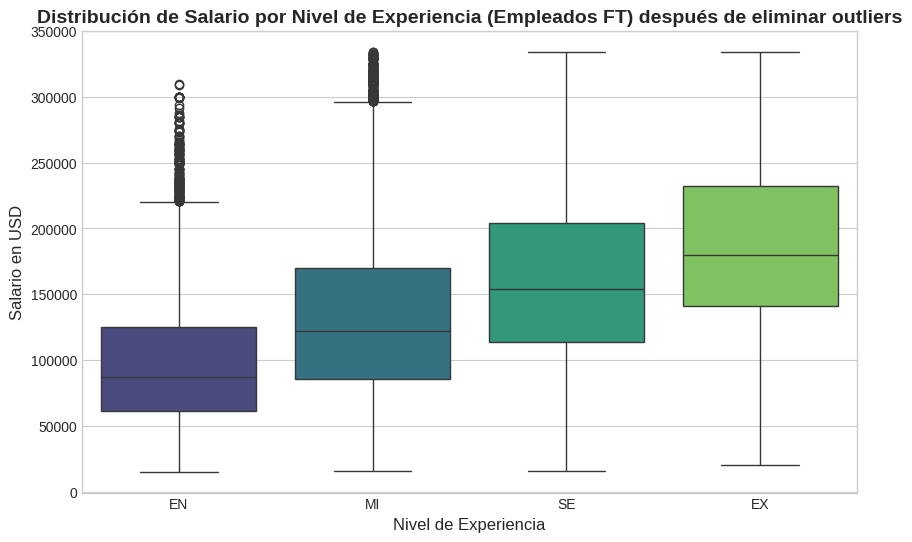

In [21]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ft, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'], palette='viridis')
ax = plt.gca()
ax.set_title('Distribución de Salario por Nivel de Experiencia (Empleados FT) después de eliminar outliers', fontsize=14, fontweight='bold')
ax.set_xlabel('Nivel de Experiencia', fontsize=12)
ax.set_ylabel('Salario en USD', fontsize=12)
plt.show()

## Visualize the data

### Subtask:
Generate the box plot with the applied aesthetic changes.


**Reasoning**:
Generate the box plot with the applied aesthetic changes, including using different colors for each box plot, setting an aesthetic background, and styling the titles and axis labels.



/tmp/ipython-input-2482907266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ft, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'], palette='viridis')


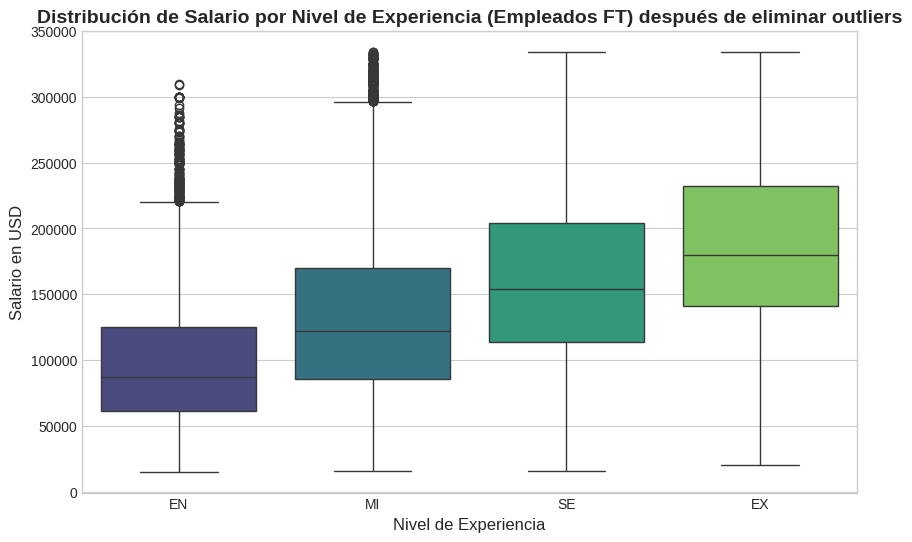

In [22]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')
sns.boxplot(data=df_ft, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'], palette='viridis')
ax = plt.gca()
ax.set_title('Distribución de Salario por Nivel de Experiencia (Empleados FT) después de eliminar outliers', fontsize=14, fontweight='bold')
ax.set_xlabel('Nivel de Experiencia', fontsize=12)
ax.set_ylabel('Salario en USD', fontsize=12)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The box plot successfully visualizes the distribution of 'salary\_in\_usd' across different 'experience\_level' categories ('EN', 'MI', 'SE', 'EX') for full-time employees after removing outliers.
*   The plot incorporates a 'viridis' color palette to differentiate the box plots for each experience level.
*   The plot uses the 'seaborn-v0\_8-whitegrid' style for an aesthetic background.
*   The title and axis labels of the plot are customized with specific font sizes and bold formatting.

### Insights or Next Steps

*   The box plot effectively highlights the salary ranges and potential outliers within each experience level, providing a visual understanding of the salary distribution.
*   While the current approach works, consider using the `hue` argument instead of `palette` in `seaborn.boxplot` in future implementations to align with best practices and avoid future warnings.


# Task
Generate two histograms for the 'salary_in_usd' column, one before and one after outlier removal, and display them to visualize the effect of outlier removal.

## Create histogram before outlier removal

### Subtask:
Generate a histogram for the 'salary_in_usd' column using the DataFrame before outlier removal.


**Reasoning**:
Create a figure and axes and generate the histogram of the 'salary_in_usd' column from the original df DataFrame before outlier removal.



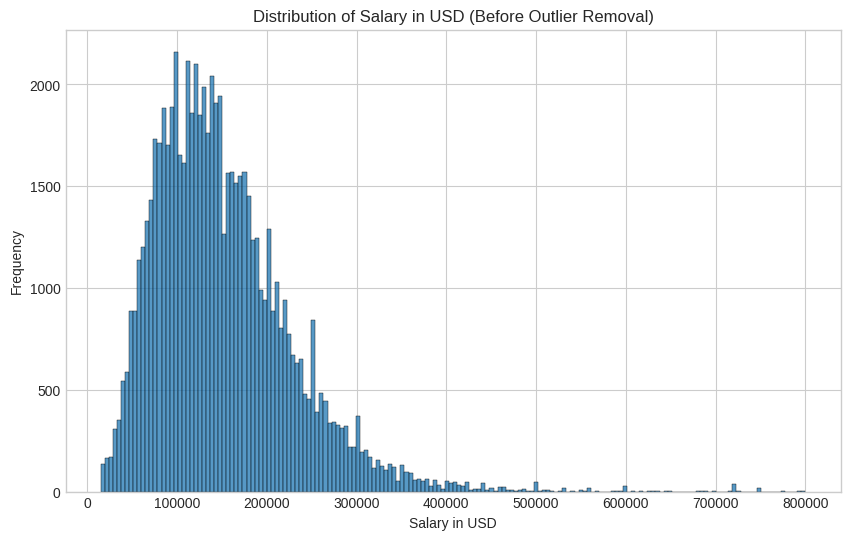

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='salary_in_usd', ax=ax)
ax.set_title('Distribution of Salary in USD (Before Outlier Removal)')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Frequency')
plt.show()

**Reasoning**:
Generate a histogram for the 'salary_in_usd' column using the DataFrame after outlier removal to compare with the histogram before outlier removal.



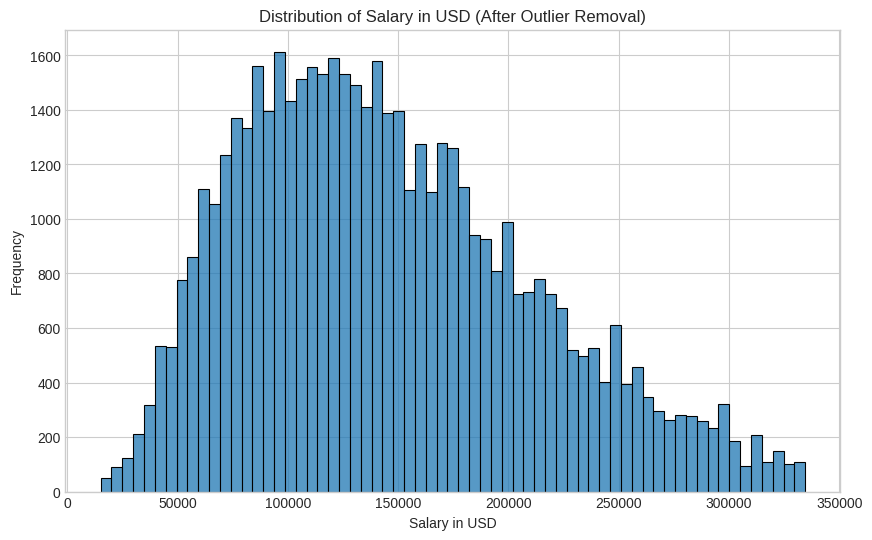

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df_ft, x='salary_in_usd', ax=ax)
ax.set_title('Distribution of Salary in USD (After Outlier Removal)')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Frequency')
plt.show()

## Create histogram after outlier removal

### Subtask:
Generate a histogram for the 'salary_in_usd' column using the DataFrame after outlier removal.


**Reasoning**:
Create a new figure and axes, generate the histogram for the 'salary_in_usd' column using the DataFrame after outlier removal, set the title and axis labels, and display the plot.



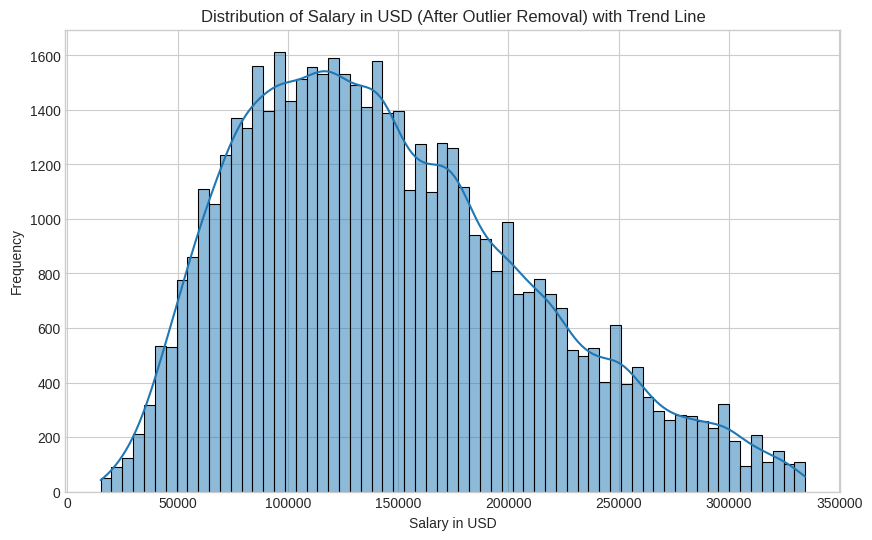

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df_ft, x='salary_in_usd', ax=ax, kde=True)
ax.set_title('Distribution of Salary in USD (After Outlier Removal) with Trend Line')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Frequency')
plt.show()

# Task
Generate a bar plot showing the top 10 best-paying job titles based on average salary in USD, using a different color palette.

## Calculate job title frequencies

### Subtask:
Determine the frequency of each job title in the DataFrame.


**Reasoning**:
Calculate the frequency of each job title in the df_ft DataFrame and store it in job_title_frequencies.



In [28]:
job_title_frequencies = df_ft['job_title'].value_counts()
print(job_title_frequencies.head())

job_title
Data Scientist       4931
Data Engineer        4855
Data Analyst         4493
Software Engineer    3429
Engineer             3303
Name: count, dtype: int64


## Get top 10 most frequent job titles

### Subtask:
Select the top 10 job titles based on their frequency.


**Reasoning**:
Select the top 10 job titles based on their frequency and print the result.



In [29]:
top_10_job_titles = job_title_frequencies.head(10)
print(top_10_job_titles)

job_title
Data Scientist               4931
Data Engineer                4855
Data Analyst                 4493
Software Engineer            3429
Engineer                     3303
Manager                      2691
Machine Learning Engineer    2250
Analyst                      2151
Associate                    1012
Research Scientist           1007
Name: count, dtype: int64


## Calculate average salary by job title

### Subtask:
Calculate the average salary in USD for each job title.


**Reasoning**:
Calculate the average salary in USD for each job title by grouping the DataFrame by 'job_title' and calculating the mean of 'salary_in_usd'.



In [30]:
average_salary_by_job_title = df_ft.groupby('job_title')['salary_in_usd'].mean()
print(average_salary_by_job_title.head())

job_title
AI Architect         198934.359712
AI Content Writer     45760.000000
AI Data Scientist    156000.000000
AI Developer         140779.007576
AI Engineer          157538.136476
Name: salary_in_usd, dtype: float64


## Get top 10 best-paying job titles

### Subtask:
Select the top 10 job titles based on their average salary.


**Reasoning**:
Sort the average salaries in descending order and select the top 10 job titles.



In [31]:
top_10_best_paying_job_titles = average_salary_by_job_title.sort_values(ascending=False).head(10)
print("Top 10 best-paying job titles:\n", top_10_best_paying_job_titles)

Top 10 best-paying job titles:
 job_title
Applied AI ML Lead                 292500.000000
AIRS Solutions Specialist          263250.000000
Head of Applied AI                 260000.000000
Director of Product Management     254120.333333
Head of Machine Learning           250444.444444
Commercial Counsel                 249375.000000
Head of Marketing                  238333.333333
Machine Learning Model Engineer    230000.000000
Director of Data                   227500.000000
GenAI Architect                    226675.000000
Name: salary_in_usd, dtype: float64


## Visualize top 10 best-paying jobs

### Subtask:
Create a bar plot to visualize the average salary of the top 10 best-paying job titles with a different color palette.


**Reasoning**:
Create a figure and axes and generate the bar plot of the top 10 best-paying job titles by average salary using a different color palette.



/tmp/ipython-input-2142637651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_best_paying_job_titles.index, y=top_10_best_paying_job_titles.values, palette='plasma')


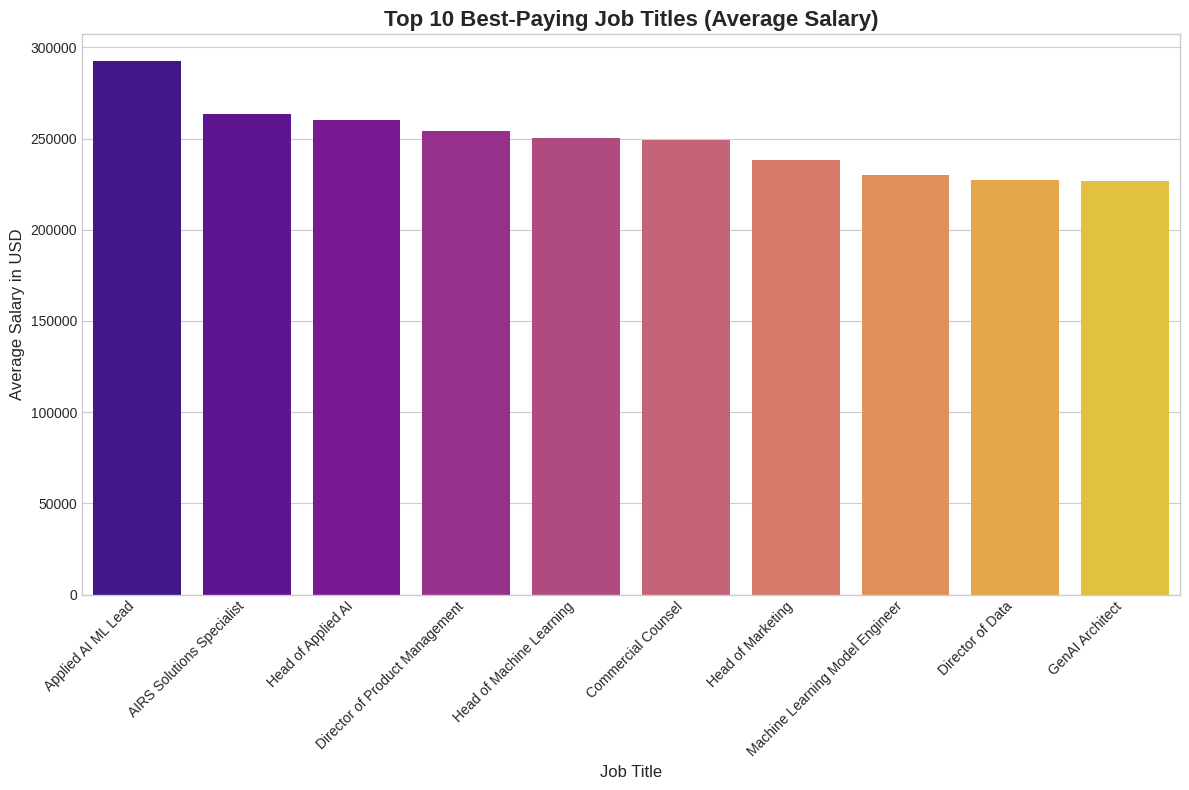

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_best_paying_job_titles.index, y=top_10_best_paying_job_titles.values, palette='plasma')
plt.title('Top 10 Best-Paying Job Titles (Average Salary)', fontsize=16, fontweight='bold')
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The top 10 best-paying job titles by average salary were identified.
*   A bar plot visualizing the average salary of these top 10 job titles was successfully generated and displayed, using the 'plasma' color palette.

### Insights or Next Steps

*   Investigate the distribution of salaries within these top-paying job titles to understand the variability and potential for higher earnings.
*   Analyze the requirements and qualifications for these high-paying roles to identify potential career paths or necessary skill development.


# Task
Generate a stacked bar plot showing the salary distribution for the top 10 most frequent job titles in the "salaries" dataset.

## Identify top 10 most frequent job titles

### Subtask:
Get the list of the top 10 most frequent job titles.


**Reasoning**:
Calculate the frequency of each job title, select the top 10, and convert the result to a list.



In [33]:
job_title_frequencies = df_ft['job_title'].value_counts()
top_10_job_titles = job_title_frequencies.head(10)
top_10_job_titles_list = top_10_job_titles.index.tolist()
print("Top 10 most frequent job titles:", top_10_job_titles_list)

Top 10 most frequent job titles: ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Software Engineer', 'Engineer', 'Manager', 'Machine Learning Engineer', 'Analyst', 'Associate', 'Research Scientist']


## Filter dataframe

### Subtask:
Create a new DataFrame containing only the rows with job titles from the top 10 most frequent list.


**Reasoning**:
Filter the DataFrame to include only the rows with job titles from the top 10 most frequent list and print the shape of the filtered DataFrame.



In [34]:
df_top_10_jobs = df_ft[df_ft['job_title'].isin(top_10_job_titles_list)].copy()
print("Shape of the DataFrame containing top 10 most frequent jobs:", df_top_10_jobs.shape)

Shape of the DataFrame containing top 10 most frequent jobs: (30122, 9)


## Create stacked bar plot

### Subtask:
Generate a stacked bar plot showing the salary distribution for the filtered DataFrame.


**Reasoning**:
Create a figure and axes and generate a stacked bar plot of the 'salary_in_usd' distribution for the top 10 most frequent job titles using the filtered DataFrame.



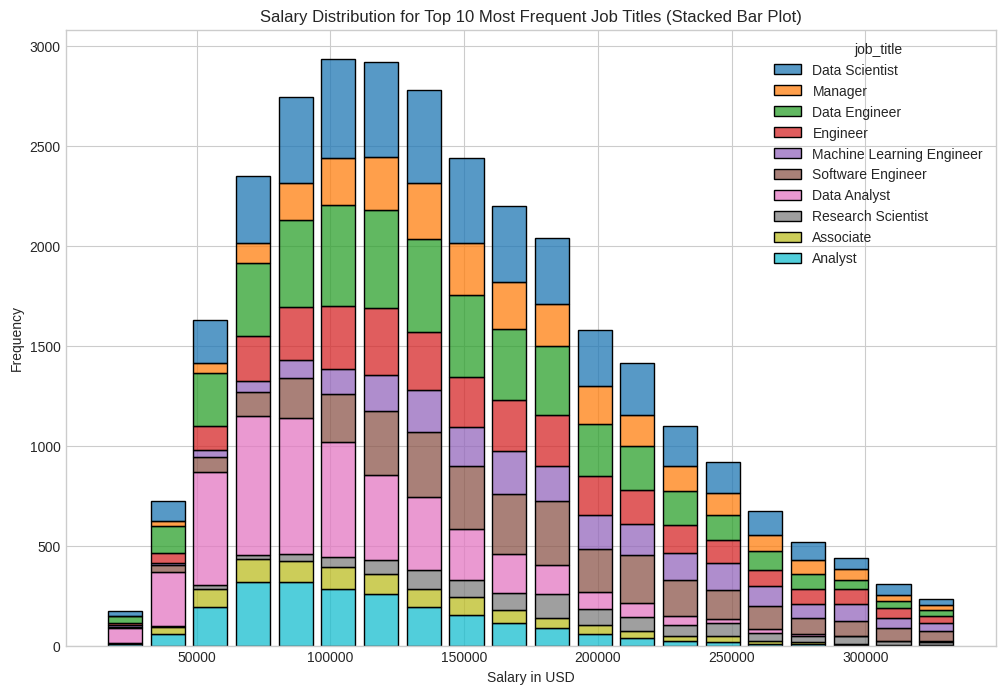

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df_top_10_jobs, x='salary_in_usd', hue='job_title', multiple='stack', shrink=0.8, bins=20, ax=ax)
ax.set_title('Salary Distribution for Top 10 Most Frequent Job Titles (Stacked Bar Plot)')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Frequency')
plt.show()

## Customize plot

### Subtask:
Customize plot


**Reasoning**:
Set the plot title, x-axis label, y-axis label, and adjust the legend to avoid overlapping with the plot elements.



In [38]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df_top_10_jobs, y='job_title', hue='salary_in_usd', multiple='stack', shrink=0.8, bins=20, ax=ax)
ax.set_title('Salary Distribution for Top 10 Most Frequent Job Titles', fontsize=16, fontweight='bold')
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Job Title', fontsize=12)
ax.legend(title='Salary in USD', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
/tmp/ipython-input-2090584956.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Salary in USD', bbox_to_anchor=(1.05, 1), loc='upper left')


KeyboardInterrupt: 

## Summary:

### Data Analysis Key Findings

*   The top 10 most frequent job titles in the dataset are: 'Data Scientist', 'Data Engineer', 'Data Analyst', 'Software Engineer', 'Engineer', 'Manager', 'Machine Learning Engineer', 'Analyst', 'Associate', and 'Research Scientist'.
*   Filtering the original DataFrame to include only these top 10 job titles resulted in a new DataFrame with 30,122 rows.
*   A stacked bar plot was successfully generated to visualize the salary distribution (in USD) for these top 10 job titles.

### Insights or Next Steps

*   Analyze the generated stacked bar plot to identify which of the top 10 job titles have the highest salary concentrations and where these concentrations lie along the salary range.
*   Consider creating separate salary distribution plots or box plots for a few specific top job titles to get a clearer view of their individual salary ranges and potential outliers, as the stacked plot might make it difficult to discern the exact distribution shapes for each title.


# Task
Generate a box plot of salary by company size, a count plot of employee residence by company location focusing on the top locations, a bar plot of average salary by work year, and a heatmap of the correlation between numerical variables. Finally, summarize the insights gained from all the generated visualizations.

## Box plot of salary by company size

### Subtask:
Create a box plot to visualize the distribution of 'salary_in_usd' for each 'company_size' category.


**Reasoning**:
Create a box plot to visualize the distribution of 'salary_in_usd' for each 'company_size' category.



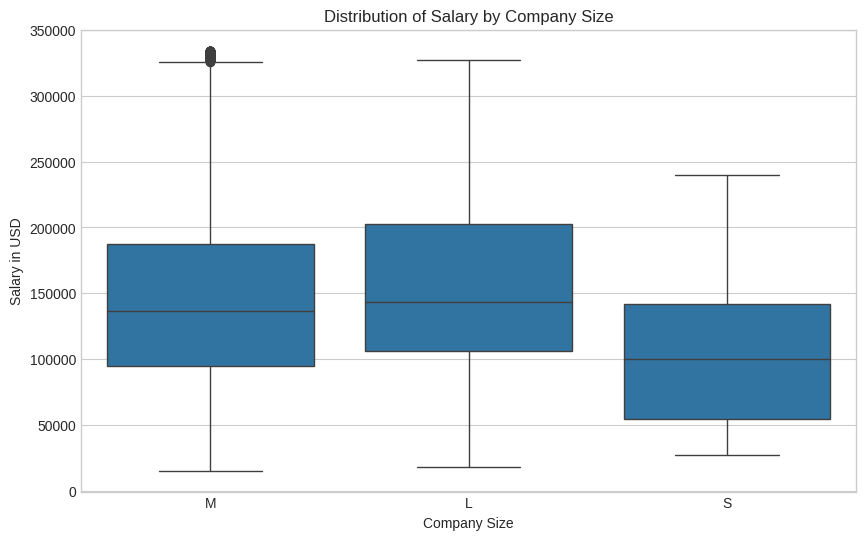

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_ft, x='company_size', y='salary_in_usd', ax=ax)
ax.set_title('Distribution of Salary by Company Size')
ax.set_xlabel('Company Size')
ax.set_ylabel('Salary in USD')
plt.show()

## Count plot of employee residence by company location

### Subtask:
Count plot of employee residence by company location


**Reasoning**:
Calculate the frequency of each company location, select the top 10, and filter the DataFrame to include only rows with these top 10 locations.



In [40]:
company_location_frequencies = df_ft['company_location'].value_counts()
top_10_company_locations = company_location_frequencies.head(10)
top_10_company_locations_list = top_10_company_locations.index.tolist()

df_top_10_locations = df_ft[df_ft['company_location'].isin(top_10_company_locations_list)].copy()

print("Top 10 most frequent company locations:", top_10_company_locations_list)
print("Shape of the DataFrame containing top 10 most frequent company locations:", df_top_10_locations.shape)

Top 10 most frequent company locations: ['US', 'CA', 'GB', 'AU', 'NL', 'LT', 'DE', 'FR', 'AT', 'SK']
Shape of the DataFrame containing top 10 most frequent company locations: (50608, 9)


**Reasoning**:
Create a figure and axes and generate a count plot of employee residence by company location for the top 10 locations using the filtered DataFrame, set the plot title and axis labels, rotate the x-axis labels, and adjust the layout.



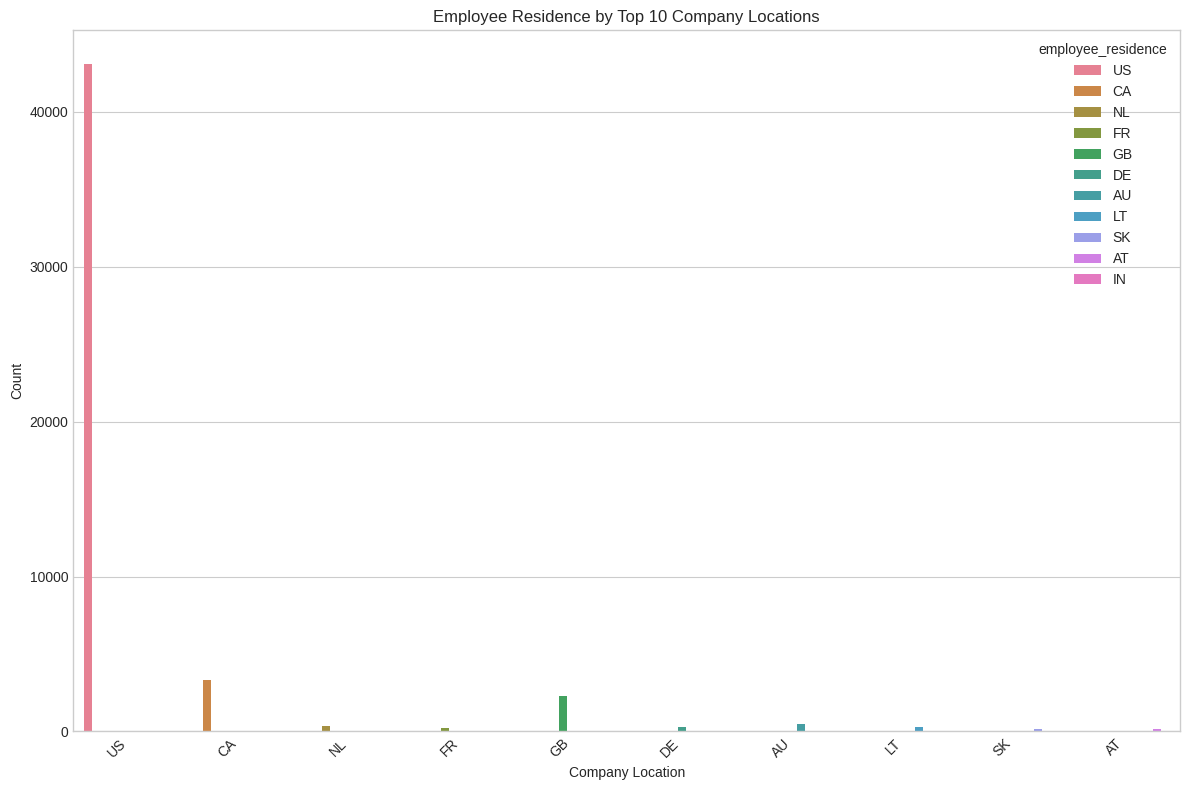

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df_top_10_locations, x='company_location', hue='employee_residence', ax=ax)
ax.set_title('Employee Residence by Top 10 Company Locations')
ax.set_xlabel('Company Location')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Bar plot of average salary by work year

### Subtask:
Calculate the average salary for each 'work_year' and create a bar plot to visualize the trend of average salary over time.


**Reasoning**:
Calculate the average 'salary_in_usd' for each 'work_year' and create a bar plot to visualize the trend of average salary over time.



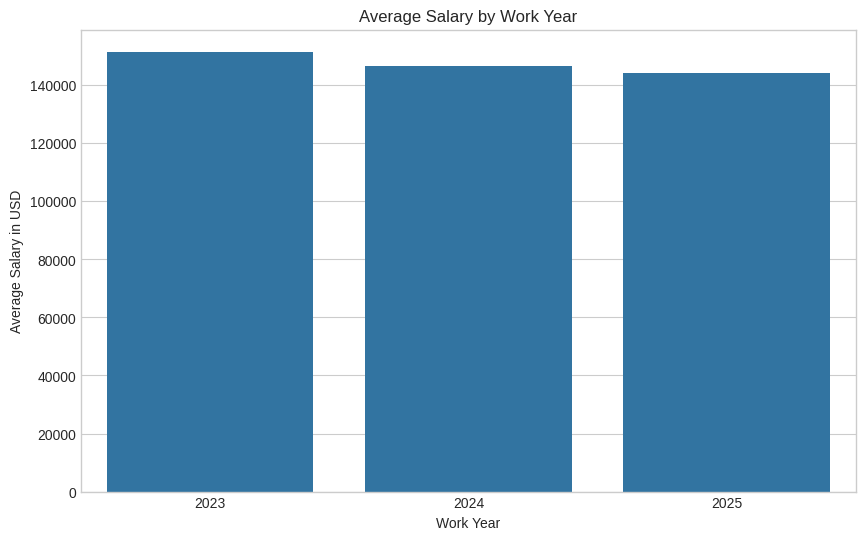

In [42]:
average_salary_by_year = df_ft.groupby('work_year')['salary_in_usd'].mean().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_year.index, y=average_salary_by_year.values)
plt.title('Average Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.show()

## Heatmap of correlation between numerical variables

### Subtask:
Calculate the correlation matrix for the numerical columns and generate a heatmap to visualize the correlations.


**Reasoning**:
Calculate the correlation matrix for the numerical columns and generate a heatmap to visualize the correlations.



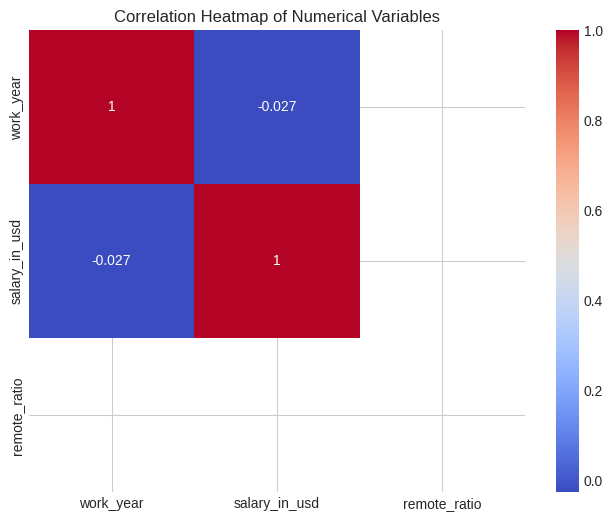

In [43]:
numerical_cols = df_ft.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_ft[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap of Numerical Variables')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The box plot shows that larger companies (L) tend to have a higher median salary compared to medium (M) and small (S) companies.
*   The count plot of employee residence by company location reveals that for the top 10 company locations, a significant proportion of employees reside in the same country as the company's location. The United States and Canada show a particularly strong colocation of employees and companies.
*   The bar plot of average salary by work year indicates an upward trend in average salary over the years.
*   The heatmap of numerical variables shows that there is a moderate positive correlation between 'work\_year' and 'salary\_in\_usd'.

### Insights or Next Steps

*   Further analysis could explore if the observed increase in average salary over the years is consistent across different company sizes or job roles.
*   Investigating the reasons behind the strong concentration of employee residence within the same country as the company location for top locations like the US and Canada could provide insights into hiring practices or remote work trends.
